In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder #preprossing techeniques
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [131]:
df = pd.read_csv("dirty_v3_path.csv")

In [132]:
df = df.loc[:,~df.columns.str.contains('^Unnamed:')]
df

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


In [133]:
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [134]:
df.tail()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258
29999,46.0,Female,Hypertension,86.52,159.26,34.55,96.60,4,217.37,141.28,5.77,1,0,4.91,5.82,1,3.64,5.47,lorem,-142.559559


In [135]:
df.describe()

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


In [136]:
df.dtypes

Age                  float64
Gender                object
Medical Condition     object
Glucose              float64
Blood Pressure       float64
BMI                  float64
Oxygen Saturation    float64
LengthOfStay           int64
Cholesterol          float64
Triglycerides        float64
HbA1c                float64
Smoking                int64
Alcohol                int64
Physical Activity    float64
Diet Score           float64
Family History         int64
Stress Level         float64
Sleep Hours          float64
random_notes          object
noise_col            float64
dtype: object

In [137]:
df.shape

(30000, 20)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [139]:
df.dropna()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
5,50.0,Male,Hypertension,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35,ipsum,108.411983
9,13.0,Female,Asthma,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41,lorem,-45.916696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,33.0,Male,Obesity,119.96,137.34,33.15,92.07,5,218.76,143.53,5.40,0,1,1.89,3.96,0,5.25,5.99,ipsum,23.871191
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


In [140]:
pd.set_option('display.max_columns', None)
df.describe(include="all").round(2)

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
count,25500.00,25500,25500,25500.00,25500.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000,30000.00
unique,NaN,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,Female,Hypertension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,###,NaN
freq,NaN,12865,7120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7575,NaN
mean,54.62,NaN,NaN,123.62,140.46,28.48,94.95,4.41,213.03,176.84,6.29,0.28,0.24,3.80,4.03,0.44,5.92,6.23,NaN,-0.52
std,15.97,NaN,NaN,41.58,21.08,5.73,3.74,2.76,33.52,48.81,1.32,0.45,0.43,2.01,1.82,0.50,2.23,1.19,NaN,100.08
min,10.00,NaN,NaN,20.32,74.24,7.67,67.51,1.00,95.73,-22.48,3.28,0.00,0.00,-3.68,-1.75,0.00,-2.44,1.59,NaN,-412.17
25%,45.00,NaN,NaN,96.28,125.14,24.59,93.00,3.00,189.50,141.28,5.33,0.00,0.00,2.35,2.77,0.00,4.37,5.41,NaN,-68.27
50%,55.00,NaN,NaN,110.50,138.32,28.05,95.30,4.00,211.84,173.36,5.97,0.00,0.00,3.59,3.79,0.00,5.90,6.23,NaN,-0.51
75%,66.00,NaN,NaN,136.61,153.79,31.81,97.38,5.00,235.31,208.63,6.92,1.00,0.00,5.06,5.02,1.00,7.44,7.05,NaN,66.81


In [141]:
df['Gender'].nunique()

2

In [142]:
df['Medical Condition'].value_counts()

Medical Condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64

In [143]:
df

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


In [144]:
print(df.duplicated().sum())

0


In [145]:
df.drop_duplicates()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


In [146]:
df.isnull()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [147]:
df.isnull().sum()

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64

In [148]:
df = df.fillna(0)

In [149]:
df.isnull()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [150]:
df.isnull().sum()

Age                  0
Gender               0
Medical Condition    0
Glucose              0
Blood Pressure       0
BMI                  0
Oxygen Saturation    0
LengthOfStay         0
Cholesterol          0
Triglycerides        0
HbA1c                0
Smoking              0
Alcohol              0
Physical Activity    0
Diet Score           0
Family History       0
Stress Level         0
Sleep Hours          0
random_notes         0
noise_col            0
dtype: int64

In [151]:
df.groupby('Medical Condition')[df.select_dtypes(include=['number']).columns].max().reset_index()

,Medical Condition,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
0,0,89.0,312.69,215.82,52.41,107.70,19,358.37,379.78,11.51,1,1,11.09,11.72,1,15.28,10.31,393.830064
1,Arthritis,89.0,148.60,190.21,43.83,106.04,5,305.96,303.87,7.62,1,1,7.28,7.54,1,12.14,9.89,314.924388
2,Asthma,59.0,132.44,181.58,40.62,108.30,6,284.24,251.19,7.86,1,1,10.41,9.76,1,12.79,8.58,375.331405
3,Cancer,79.0,171.41,178.34,38.96,110.07,19,288.01,319.61,8.67,1,1,8.63,8.96,1,14.85,9.33,325.273521
4,Diabetes,74.0,318.51,194.79,48.43,105.34,8,313.37,358.12,12.36,1,1,9.03,7.12,1,13.18,9.71,332.524653
5,Healthy,69.0,142.06,151.41,37.22,103.61,2,246.72,195.49,6.21,1,1,12.41,12.06,1,9.56,10.35,467.894910
6,Hypertension,84.0,181.48,226.38,42.58,104.48,6,355.27,360.35,8.22,1,1,9.72,9.74,1,15.45,10.16,358.132683
7,Obesity,64.0,173.43,192.58,56.85,106.32,5,323.39,421.51,8.65,1,1,5.96,6.42,1,11.58,9.95,349.511964


In [152]:
# Calculate KPIs
kpis = {
    'Average Age': df['Age'].mean(),
    'Average BMI': df['BMI'].mean(),
    'Average Blood Pressure': df['Blood Pressure'].mean(),
    'Average Glucose Level': df['Glucose'].mean(),
    'Smoking %': (df['Smoking'].value_counts(normalize=True).get('Yes', 0) * 100),
    'Alcohol %': (df['Alcohol'].value_counts(normalize=True).get('Yes', 0) * 100),
    'Medical condition %': (df['Medical Condition'].value_counts(normalize=True).get('Yes', 0) * 100)
}

# Display KPIs
for k, v in kpis.items():
    print(f"{k}: {v:.2f}")


Average Age: 46.42
Average BMI: 28.48
Average Blood Pressure: 119.39
Average Glucose Level: 105.08
Smoking %: 0.00
Alcohol %: 0.00
Medical condition %: 0.00


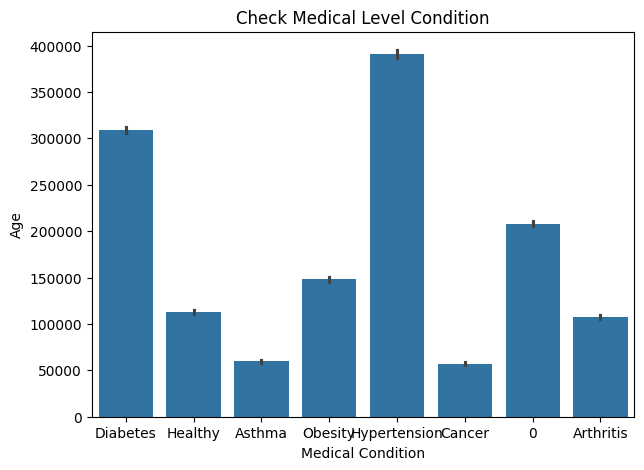

In [153]:
#predict medical level

plt.figure(figsize=(7,5))
sns.barplot(x="Medical Condition", y="Age", data=df, estimator=sum)
plt.title("Check Medical Level Condition")
plt.show()


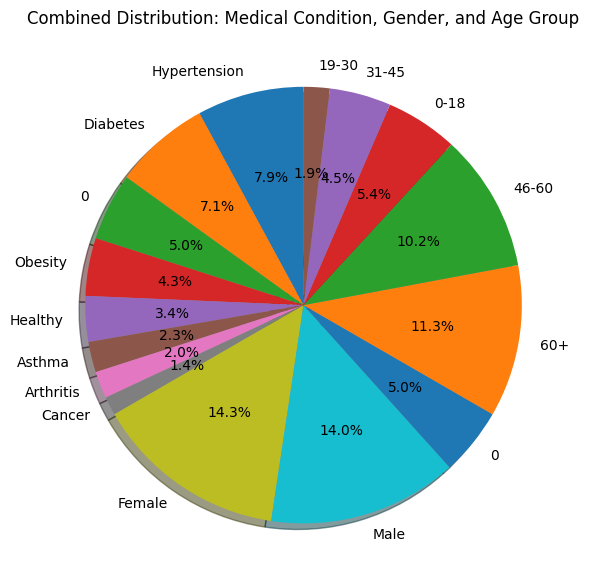

In [154]:
#check medical levels

# Drop null values
df.dropna(subset=['Medical Condition', 'Age', 'Gender'], inplace=True)

# Create Age Groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Combine category counts
medical_counts = df['Medical Condition'].value_counts()
gender_counts = df['Gender'].value_counts()
age_counts = df['Age Group'].value_counts()

# Merge all counts into one Series
combined_counts = pd.concat([
    medical_counts,
    gender_counts,
    age_counts
])

# Create one combined pie chart
plt.figure(figsize=(6,6))
combined_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    legend=False
)
plt.title('Combined Distribution: Medical Condition, Gender, and Age Group')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [155]:
df

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col,Age Group
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211,46-60
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610,19-30
2,50.0,0,Asthma,95.24,0.00,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195,46-60
3,57.0,0,Obesity,0.00,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175,46-60
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837,46-60
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517,31-45
29997,83.0,Female,0,0.00,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595,60+
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258,31-45


In [178]:
#selecting the datas

data = df[[ 'Age', 'Cholesterol', 'LengthOfStay',  'Glucose', 'Blood Pressure', 
            'Alcohol', ]].dropna()
data.head()

,Age,Cholesterol,LengthOfStay,Glucose,Blood Pressure,Alcohol
0,46.0,231.88,6,137.04,135.27,0
1,22.0,165.57,2,71.58,113.27,0
2,50.0,214.94,2,95.24,0.00,0
3,57.0,197.71,5,0.00,130.53,0
4,66.0,259.53,4,95.15,178.17,1


In [235]:
from sklearn.preprocessing import LabelEncoder



# Create label encoder
le = LabelEncoder()

# Encode categorical columns
data['Age'] = le.fit_transform(data['Age'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])
# Display encoded data
data

,Age,Cholesterol,LengthOfStay,Glucose,Blood Pressure,Alcohol
0,37,7710,6,6245,3344,0
1,13,1509,2,439,1185,0
2,41,6074,2,2420,0,0
3,48,4404,5,0,2874,0
4,57,10113,4,2411,7231,1
...,...,...,...,...,...,...
29995,45,6425,1,1563,2593,0
29996,32,4463,4,1834,5227,0
29997,74,5612,3,0,6643,0
29998,32,5488,3,10740,5090,0


In [237]:
X = data.drop('Alcohol', axis=1)
y = data['Alcohol']
y
X

,Age,Cholesterol,LengthOfStay,Glucose,Blood Pressure
0,37,7710,6,6245,3344
1,13,1509,2,439,1185
2,41,6074,2,2420,0
3,48,4404,5,0,2874
4,57,10113,4,2411,7231
...,...,...,...,...,...
29995,45,6425,1,1563,2593
29996,32,4463,4,1834,5227
29997,74,5612,3,0,6643
29998,32,5488,3,10740,5090


In [238]:
#scaler numerical features
#preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.08079987,  0.63908063,  0.57427935,  0.79302263,  0.04748966],
       [-1.17375666, -1.48794586, -0.87421405, -1.1487737 , -0.91952762],
       [ 0.1013596 ,  0.0779106 , -0.87421405, -0.4862352 , -1.45028977],
       ...,
       [ 1.60417519, -0.08056162, -0.5120907 , -1.29559571,  1.52511356],
       [-0.3084992 , -0.12309529, -0.5120907 ,  2.29635961,  0.82952401],
       [-0.08079987,  0.15714671, -0.14996735, -0.7675047 ,  1.10095174]],
      shape=(30000, 5))

In [257]:
#train test split

from sklearn.model_selection import train_test_split

#simple train-test-split

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.12,random_state=42)
print("Train size:",x_train.shape,"Test Size:",x_test.shape)

Train size: (26400, 5) Test Size: (3600, 5)


In [258]:
#testing side with accuracy

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix #result checking tech
from sklearn.ensemble import RandomForestClassifier

print("-------------Random Forest Algorithm:---------------")

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


-------------Random Forest Algorithm:---------------
Accuracy: 0.7519444444444444
Confusion Matrix:
 [[2682   63]
 [ 830   25]]


In [259]:
#check svm model and gradientboosting

print("-------------Support Vector MAchine Algorithm:---------------")
from sklearn.svm import SVC

# SVM
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
print("-----------------Gradient Boosting Accuracy:-----------------")
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


-------------Support Vector MAchine Algorithm:---------------
Accuracy: 0.7625
Confusion Matrix:
 [[2745    0]
 [ 855    0]]
-----------------Gradient Boosting Accuracy:-----------------
Accuracy: 0.7625
Confusion Matrix:
 [[2745    0]
 [ 855    0]]


In [260]:
#check regression

# algorithm 1
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate
print("-----Linear Regression Results:-----------")
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
# Metrics
print("MAE-> mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("MSE-> mean_squared_error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

print("------------------------------------")
print("--------Lasso Regression Results:--------")
from sklearn.linear_model import Lasso

# Model
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# Metrics
print("MAE-> mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("MSE-> mean_squared_error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


# Evaluate
print("------------Ridge Regression Results:---------")
from sklearn.linear_model import Ridge

# Model
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

# Metrics
print("MAE-> mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("MSE-> mean_squared_error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))



-----Linear Regression Results:-----------
MAE-> mean_absolute_error: 0.3597554079483044
MSE-> mean_squared_error: 0.17910631381311248
RMSE: 0.4232095388966469
R2 Score: 0.010974626053563585
------------------------------------
--------Lasso Regression Results:--------
MAE-> mean_absolute_error: 0.3628039772727273
MSE-> mean_squared_error: 0.1810951288452709
RMSE: 0.4255527333307482
R2 Score: -7.613985965271297e-06
------------Ridge Regression Results:---------
MAE-> mean_absolute_error: 0.3628039772727273
MSE-> mean_squared_error: 0.1810951288452709
RMSE: 0.4255527333307482
R2 Score: -7.613985965271297e-06


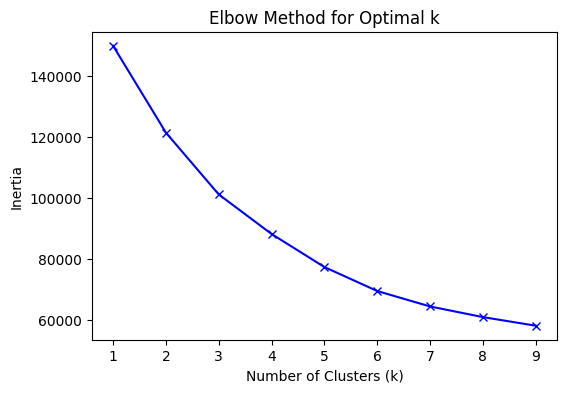

🔹 K-Means Clustering Results:


KeyError: "['Customer Acquisition Type', 'Product', 'Revenue'] not in index"

In [261]:
# -------------------------------
# 🌀 Step 7: Clustering using KMeans
# -------------------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use scaled data (X_scaled) for clustering
# Decide number of clusters using Elbow Method
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal number of clusters (example: k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to data
data['Cluster'] = kmeans.labels_

# Display sample results
print("🔹 K-Means Clustering Results:")
print(data[['Age', 'Cholesterol', '', 'Cluster']].head())

# Analyze each cluster
cluster_summary = data.groupby('Cluster')[['Units', 'Revenue']].mean()
print("\n🔹 Cluster Summary:")
print(cluster_summary)


